In [1]:
#Import packages
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy


#Load the data as a data frame
df=pd.read_csv('startup.csv')
df.columns



Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [2]:
df.shape

(50, 5)

In [3]:
# Get basic description of the data, looking the spread of the different variables
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
#Correlation matrix
corr=df.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


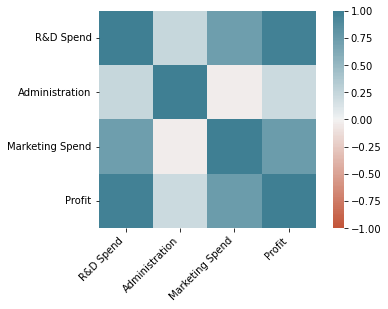

In [5]:
#Colored graph of correlations
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [6]:
# Copy all the predictor variables into X dataframe
X = df.drop('Profit', axis=1)

# Copy target into the y dataframe. 
y = df[['Profit']]

In [7]:
#Extract predictor variables (remove categorical variables)
X=df[['R&D Spend', 'Administration', 'Marketing Spend']]
y=df['Profit']

In [8]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


In [9]:
#Fit the linear regression model
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()


/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     246.8
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.14e-22
Time:                        15:41:30   Log-Likelihood:                -384.45
No. Observations:                  37   AIC:                             776.9
Df Residuals:                      33   BIC:                             783.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.247e+04   7030.591      7.463      0.000    3.82e+04    6.68e+04
R&D Spend           0.8054      0.048     16.946      0.000       0.709       0.902
Administration     -0.0353      0.055     -0.639      0.527      -0.148       0.077
Marketing Spend     0.0224      0.017      1.348      0.187      -0.011       0.056
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.372
Skew:                          -0.136   Prob(JB):                        0.830
Kurtosis:                       2.592   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Let's try throwing in state data using dummy variables
state=set(df.State)
state

nominal_features = pd.get_dummies(df['State'])
nominal_features


,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [11]:
df_encoded=pd.concat([df,nominal_features], axis=1)
df_encoded


,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [12]:
#Run with state encoding
X=df_encoded[['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'Florida', 'New York']]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()



/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.98e-20
Time:                        15:41:31   Log-Likelihood:                -384.02
No. Observations:                  37   AIC:                             780.0
Df Residuals:                      31   BIC:                             789.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.008e+04   5453.731      7.349      0.000     2.9e+04    5.12e+04
R&D Spend           0.8106      0.049     16.589      0.000       0.711       0.910
Administration     -0.0460      0.058     -0.797      0.431      -0.164       0.072
Marketing Spend     0.0227      0.017      1.315      0.198      -0.012       0.058
California       1.516e+04   2998.725      5.057      0.000    9047.343    2.13e+04
Florida          1.233e+04   2726.186      4.524      0.000    6774.088    1.79e+04
New York         1.258e+04   2496.229      5.040      0.000    7489.319    1.77e+04
==============================================================================
Omnibus:                        0.003   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.157
Skew:                          -0.002   Prob(JB):                        0.924
Kurtosis:                       2.681   Cond. No.                     1.45e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/Users/sangramthakur/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


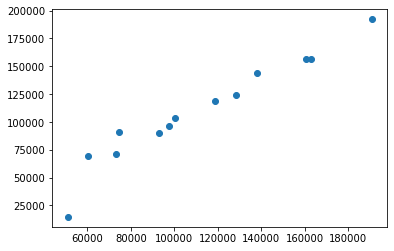

In [13]:
#Look at model plot
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

#plot the scatter plot between the fitted values and actual test values for repsonse variable
plt.scatter(y_test_fitted, y_test)
plt.show()

